# Read 10-Q files

In [12]:
import glob

form_type = '10-q'
sectors = ['Energy', 'Financial', 'Healthcare']
docs = []
for sector in sectors:
    for folder in glob.glob(form_type+'_'+sector + '/*'):
        for filename in glob.glob(folder+'/*.txt'):
            with open(filename,'r') as f:
                doc = f.read()
                docs.append((filename, doc))

In [13]:
import pandas as pd

docs_df = pd.DataFrame(docs)
docs_df.columns = ['path', 'content']

In [19]:
docs_df['form_type'] = '10-q'

# Read 10-K files

In [15]:
#form_type = '10-k'
sectors = ['Energy', 'Financial', 'Healthcare']
docs = []
for sector in sectors:
    for folder in glob.glob(sector + '/*'):
        for filename in glob.glob(folder+'/*.txt'):
            with open(filename,'r') as f:
                doc = f.read()
                docs.append((filename, doc))

In [16]:
docs_df_10K = pd.DataFrame(docs)
docs_df_10K.columns = ['path', 'content']

In [18]:
docs_df_10K['form_type'] = '10-k'

In [21]:
docs_df_10K

,path,content,form_type
0,Energy/KMI/20150223.txt,Item 1A. Risk Factors. You should carefully co...,10-k
1,Energy/KMI/20140224.txt,Item 1A. Risk Factors. You should carefully co...,10-k
2,Energy/KMI/20130301.txt,Item 1A. Risk Factors. You should carefully co...,10-k
3,Energy/KMI/20110302.txt,Item 1A. Risk Factors. You should carefully ...,10-k
4,Energy/KMI/20170210.txt,Item 1A. Risk Factors. You should carefully co...,10-k
...,...,...,...
1762,Healthcare/PKI/20160301.txt,Item 1A. Risk Factors” for an additional descr...,10-k
1763,Healthcare/PKI/20090226.txt,Item 1A. Risk Factors.” Intellectual Proper...,10-k
1764,Healthcare/PKI/20190226.txt,Item 1A. Risk Factors” for an additional descr...,10-k
1765,Healthcare/PKI/20070301.txt,Item 1A. Risk Factors The following importa...,10-k


# Data Processing

In [37]:
df_10X = pd.concat([docs_df, docs_df_10K], ignore_index=True)

In [38]:
# split the path for further use
df_10X['split'] = df_10X.path.str.split('/')

In [42]:
# extract sector from path
df_10X['sector'] = df_10X['split'].apply(lambda x: x[0])

In [43]:
# extract company ticker from path
df_10X['company'] = df_10X['split'].apply(lambda x: x[1])

In [46]:
# extract date from path
df_10X['date'] = df_10X['split'].apply(lambda x: x[-1][:-4])

In [51]:
# clean sector
df_10X.sector = df_10X.sector.str.split('_').apply(lambda x: x[-1])

In [54]:
del df_10X['split']

In [57]:
df_10X.date = pd.to_datetime(df_10X.date)

In [72]:
df_10X = df_10X.sort_values(['sector','company', 'date']).reset_index()

In [75]:
del df_10X['index']

# Save as Excel file

In [106]:
df_10X.to_excel('./risk_factor_10X.xlsx')

# calculate content length to decide the cut-off point for repetitive contents, such as:


In [119]:
df_10X.content[3]

'ITEM 1A. RISK FACTORS  During the quarter ending March 31, 2008, there were no material changes from the risk factors as previously disclosed in the Company’s Annual Report on Form 10-K for the year ended December 31, 2007.    ITEM 2. UNREGISTERED SALES OF EQUITY SECURITIES AND USE OF PROCEEDS'

In [81]:
df_10X['content_length'] = df_10X.content.apply(len)

In [89]:
df_10X[df_10X['content_length'] <= 500]

,path,content,form_type,sector,company,date,content_length
3,10-q_Energy/APA/20080512.txt,ITEM 1A. RISK FACTORS During the quarter endi...,10-q,Energy,APA,2008-05-12,294
4,10-q_Energy/APA/20080811.txt,ITEM 1A. RISK FACTORS During the quarter endi...,10-q,Energy,APA,2008-08-11,293
5,10-q_Energy/APA/20081110.txt,ITEM 1A. RISK FACTORS During the quarter endi...,10-q,Energy,APA,2008-11-10,298
7,10-q_Energy/APA/20090508.txt,ITEM 1A. RISK FACTORS During ...,10-q,Energy,APA,2009-05-08,328
15,10-q_Energy/APA/20110509.txt,ITEM 1A. RISK FACTORS During the q...,10-q,Energy,APA,2011-05-09,327
...,...,...,...,...,...,...,...
5616,10-q_Healthcare/XRAY/20170510.txt,Item 1ARisk Factors45 Item 2Unregistered Sal...,10-q,Healthcare,XRAY,2017-05-10,82
5617,10-q_Healthcare/XRAY/20170809.txt,Item 1ARisk Factors58 Item 2Unregistered Sal...,10-q,Healthcare,XRAY,2017-08-09,82
5618,10-q_Healthcare/XRAY/20171109.txt,Item 1ARisk Factors59 Item 2Unregistered Sal...,10-q,Healthcare,XRAY,2017-11-09,82
5620,10-q_Healthcare/XRAY/20180507.txt,Item 1ARisk Factors50 Item 2Unregistered Sal...,10-q,Healthcare,XRAY,2018-05-07,82


In [102]:
df_10X[df_10X.form_type == '10-q'].content_length.describe()

count      3855.000000
mean      50495.105318
std      117990.209390
min          70.000000
25%         304.000000
50%        1723.000000
75%       49916.500000
max      988831.000000
Name: content_length, dtype: float64

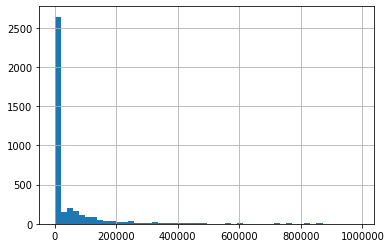

In [105]:
df_10X[df_10X.form_type == '10-q'].content_length.hist(bins=50)

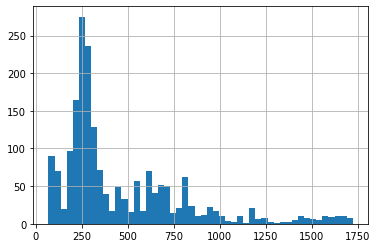

In [116]:
df_10X[ df_10X.content_length <= 1723].content_length.hist(bins=50)

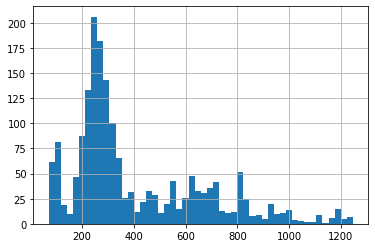

In [117]:
df_10X[ df_10X.content_length <= 1250].content_length.hist(bins=50)

In [142]:
df_10X[ df_10X.content_length <= 1220].sort_values('content_length').content.tolist()[-1]

'ITEM 1A. RISK FACTORS  In addition to the information set forth below and other information contained in this report, you should carefully consider the factors discussed in “Part II, Item 1A. Risk Factors” in our June 30, 2009 Quarterly Report filed on Form 10-Q and “Part I, Item 1A. Risk Factors” in our 2008 Annual Report filed on Form 10-K, which could materially affect our business, financial condition or future results.  Heightened regulatory enforcement may adversely affect our ability to market and sell our products.  Heightened regulatory enforcement arising from changes in the political and regulatory environment as well as economic pressures may adversely affect our ability to obtain regulatory approval for our products and to maintain for sale products previously approved. The FDA’s enhanced reporting requirements and ability to analyze reported data may result in more frequent field actions which may include communications to physicians and patients, recall of product from 

In [ ]:
'There [(have)|(has)] been no material'
'no material'

In [103]:
df_10X[df_10X.form_type == '10-k'].content_length.describe()

count      1767.000000
mean      65182.013016
std       45038.990029
min        4227.000000
25%       33530.000000
50%       54085.000000
75%       83363.500000
max      397581.000000
Name: content_length, dtype: float64

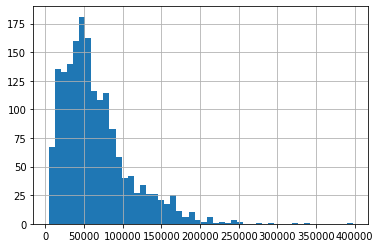

In [108]:
df_10X[df_10X.form_type == '10-k'].content_length.hist(bins=50)

In [144]:
df_10X['no_material_change'] = df_10X.content.str.contains('no material')

In [150]:
df_10X['no_material_change'].describe()

count      5622
unique        2
top       False
freq       3497
Name: no_material_change, dtype: object

In [156]:
df_10X.groupby(by = ['no_material_change', 'form_type']).min()

path  \
no_material_change form_type                                 
False              10-k            Energy/APA/20060314.txt   
                   10-q       10-q_Energy/APA/20100507.txt   
True               10-k            Energy/DVN/20060303.txt   
                   10-q       10-q_Energy/APA/20080512.txt   

                                                                        content  \
no_material_change form_type                                                      
False              10-k       Certain Risks   The following risks and uncert...   
                   10-q       ITEM   1A. RISK FACTORS  Reference is made to ...   
True               10-k       ITEM 1A.  Risk Factors We are subject to numer...   
                   10-q       ITEM 1A.    RISK FACTORS               During ...   

                              sector company       date  content_length  
no_material_change form_type                                             
False              10-k       Energy       A 2006-01-17            4227  
                   10-q       Energy       A 2006-11-08              70  
True               10-k       Energy     CFG 2006-03-03           14625  
                   10-q       Energy    ABBV 2007-08-08             169